In [5]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt


data = pd.read_excel('../City-Specific Data/Seattle.xlsx')
data = data.dropna()


data['Time'] = pd.to_datetime(data['Time'])
df = data.rename(columns={'Time': 'ds', 'EnergyDemand': 'y'})

model = Prophet()

model.add_regressor('Temperature')
model.add_regressor('DewPoint')
model.add_regressor('WindSpeed')
model.add_regressor('Pressure')
model.add_regressor('RelativeHumidity')

model.fit(df)

future = model.make_future_dataframe(periods=0)
future['Temperature'] = df['Temperature']
future['DewPoint'] = df['DewPoint']
future['WindSpeed'] = df['WindSpeed']
future['Pressure'] = df['Pressure']
future['RelativeHumidity'] = df['RelativeHumidity']

print(future.isnull().sum())

future.fillna(method='ffill', inplace=True)

print(future.isnull().sum())

forecast = model.predict(future)



12:24:22 - cmdstanpy - INFO - Chain [1] start processing
12:24:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_13040/501974928.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future.fillna(method='ffill', inplace=True)


ds                    0
Temperature         487
DewPoint            487
WindSpeed           487
Pressure            487
RelativeHumidity    487
dtype: int64
ds                  0
Temperature         0
DewPoint            0
WindSpeed           0
Pressure            0
RelativeHumidity    0
dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


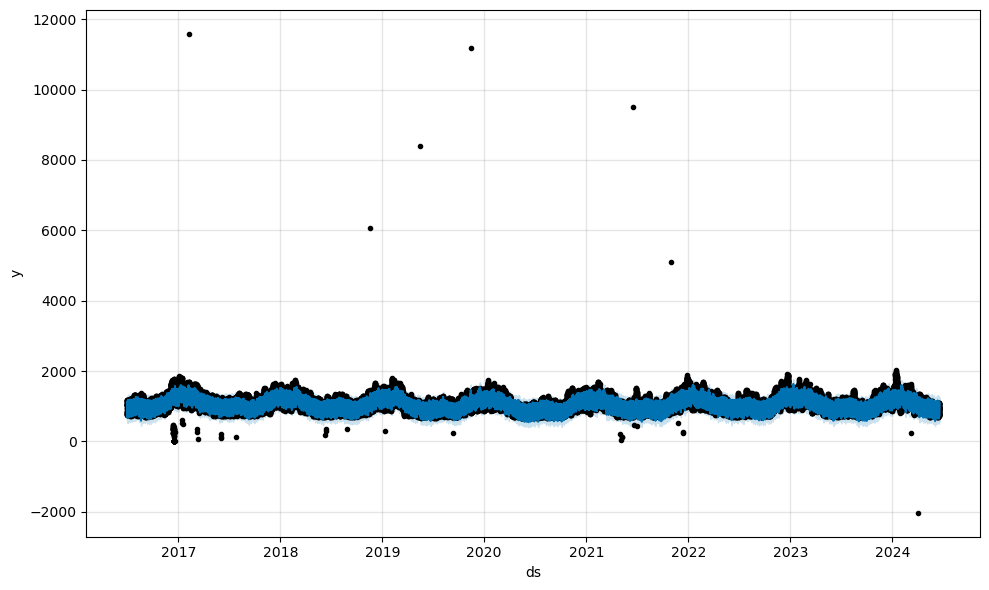

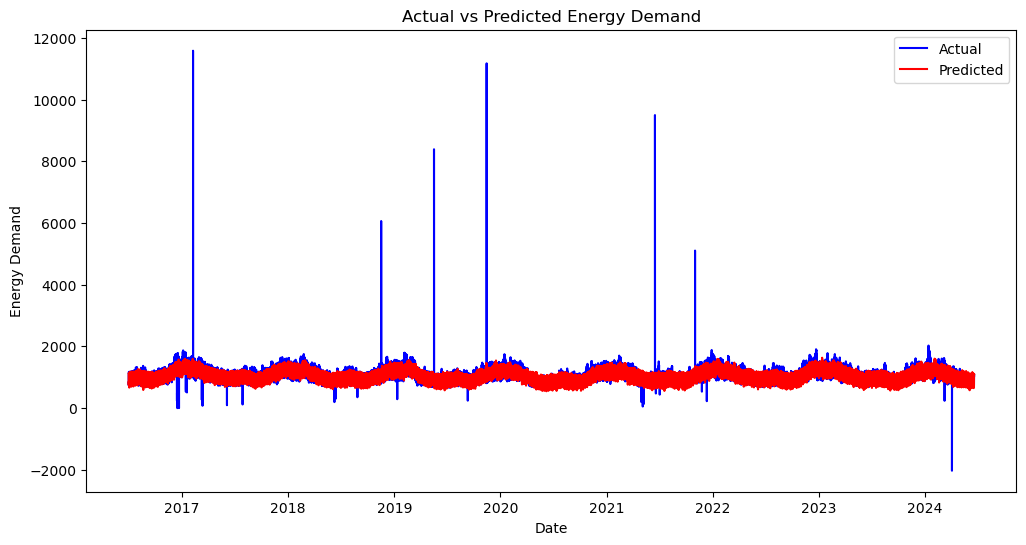

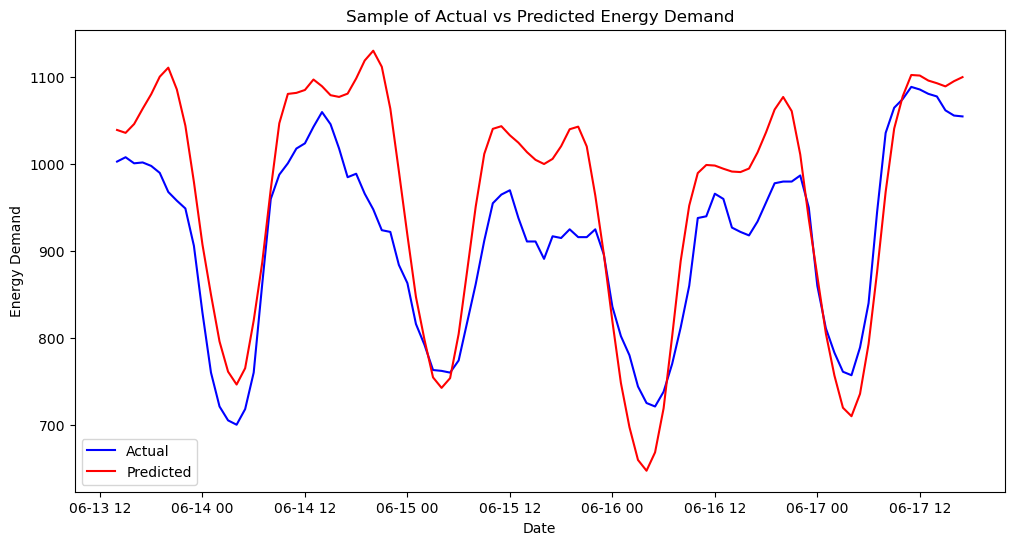

In [6]:
fig = model.plot(forecast)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Actual', color='b')
plt.plot(df['ds'], forecast['yhat'], label='Predicted', color='r')
plt.title('Actual vs Predicted Energy Demand')
plt.xlabel('Date')
plt.ylabel('Energy Demand')
plt.legend()
plt.show()


sample_period = 100
plt.figure(figsize=(12, 6))
plt.plot(df['ds'].iloc[-sample_period:], df['y'].iloc[-sample_period:], label='Actual', color='b')
plt.plot(df['ds'].iloc[-sample_period:], forecast['yhat'].iloc[-sample_period:], label='Predicted', color='r')
plt.title('Sample of Actual vs Predicted Energy Demand')
plt.xlabel('Date')
plt.ylabel('Energy Demand')
plt.legend()
plt.show()

In [8]:
import numpy as np

df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

aligned_df = df.join(forecast[['yhat']], how='inner')

non_zero_data = aligned_df[aligned_df['y'] != 0]
non_zero_errors = np.abs((non_zero_data['y'] - non_zero_data['yhat']) / non_zero_data['y'])
non_zero_mape = non_zero_errors.mean() * 100
print("MAPE excluding zeros:", non_zero_mape)



MAPE excluding zeros: 6.7835391632233994
